In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:

data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TotalPurchase': [500, 1000, 200, 800, 1500, 300, 600, 1200, 100, 700],
    'NumPurchases': [5, 10, 2, 8, 15, 3, 6, 12, 1, 7]
}

df = pd.DataFrame(data)

In [3]:
# Select features for clustering
X = df[['TotalPurchase', 'NumPurchases']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

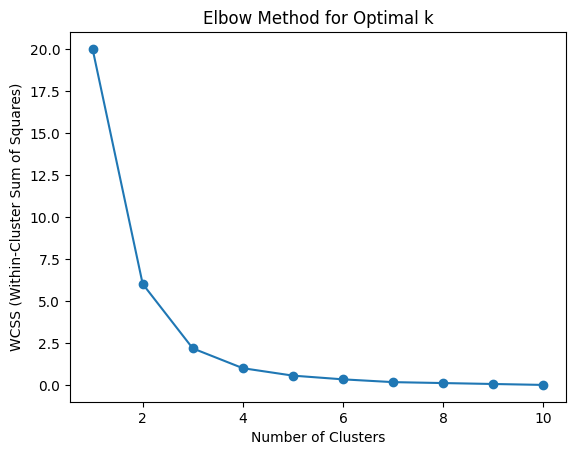

In [4]:
# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [5]:

k = 3


kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

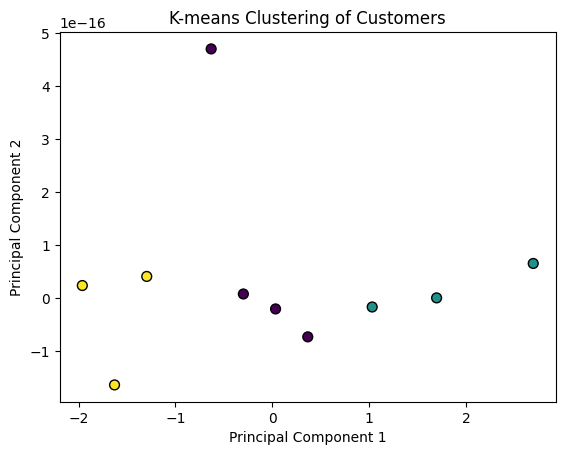

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Customers')
plt.show()

In [7]:
print(df[['CustomerID', 'TotalPurchase', 'NumPurchases', 'Cluster']])

   CustomerID  TotalPurchase  NumPurchases  Cluster
0           1            500             5        0
1           2           1000            10        1
2           3            200             2        2
3           4            800             8        0
4           5           1500            15        1
5           6            300             3        2
6           7            600             6        0
7           8           1200            12        1
8           9            100             1        2
9          10            700             7        0
